# Analyse results from power flow

In [1]:
import Pkg

# activate parent environment
Pkg.activate(normpath(joinpath(@__DIR__, ".")))
Pkg.resolve()
Pkg.instantiate()
Pkg.status()

using CSV
using DataFrames
using CairoMakie

using Revise
using OptHP

  Activating project at `c:\Users\lange\OneDrive\Projects\2024\EEM25\Congestion-Management-based-on-Thermal-Comfort`
  No Changes to `C:\Users\lange\OneDrive\Projects\2024\EEM25\Congestion-Management-based-on-Thermal-Comfort\Project.toml`
  No Changes to `C:\Users\lange\OneDrive\Projects\2024\EEM25\Congestion-Management-based-on-Thermal-Comfort\Manifest.toml`
Precompiling project...
  ✓ OptHP
  1 dependency successfully precompiled in 9 seconds. 291 already precompiled.


Status `C:\Users\lange\OneDrive\Projects\2024\EEM25\Congestion-Management-based-on-Thermal-Comfort\Project.toml`
  [336ed68f] CSV v0.10.15
  [13f3f980] CairoMakie v0.13.1
  [a93c6f00] DataFrames v1.7.0
  [87dc4568] HiGHS v1.13.0
  [682c06a0] JSON v0.21.4
  [4076af6c] JuMP v1.23.6
  [b964fa9f] LaTeXStrings v1.4.0
  [b8f27783] MathOptInterface v1.35.2
  [2d871509] OptHP v1.0.0-DEV `OptHP`
  [295af30f] Revise v3.7.2
  [2913bbd2] StatsBase v0.34.4
⌃ [f269a46b] TimeZones v1.20.0
  [ade2ca70] Dates
Info Packages marked with ⌃ have new versions available and may be upgradable.


## Load data

In [5]:
base_nohp = CSV.read("results/base_result_no_hp_2024-02-05.csv", DataFrame)
first(base_nohp, 5)

Row,P,Q,J_heat
,Float64,Float64,Float64
1,8.98232,-0.0246436,0.0
2,4.96453,-0.00802877,0.0
3,9.99331,-0.0303256,0.0
4,6.13209,-0.0118119,0.0
5,5.29777,-0.00938523,0.0


In [6]:
base_hp = CSV.read("results/base_result_hp_2024-02-05.csv", DataFrame)
first(base_hp, 5)

Row,P_kw,Q_kw,J_heat_euro,PPD,T_i,T_e,T_h,P_HP,Φ_HP,Φ_CV
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,23.1535,0.166874,2.27828,9.73333,20.0,20.0,20.0,1.0841,5.0,14.8
2,18.9809,0.0378368,2.27865,9.7567,19.9841,19.9992,36.4067,1.08591,5.0,14.8
3,24.2003,0.160503,1.44109,9.66843,20.0443,19.9985,49.4225,1.0841,5.0,8.7577
4,20.2164,-0.152156,0.754934,9.51324,20.1501,19.9981,54.7544,1.08772,5.0,3.80003
5,19.3993,0.0309639,0.229183,9.34291,20.2662,19.998,54.8974,1.09135,5.0,0.0


In [7]:
base_hp_cong = CSV.read("results/congestion_0kW_result_hp_2024-02-05.csv", DataFrame)
first(base_hp_cong, 5)

Row,P_kw,Q_kw,J_heat_euro,PPD,T_i,T_e,T_h,P_HP,Φ_HP,Φ_CV
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,22.6352,-0.178072,2.27828,9.73333,20.0,20.0,20.0,1.0841,5.0,14.8
2,18.4779,-0.116345,2.27866,9.7567,19.9841,19.9992,36.4067,1.08591,5.0,14.8
3,23.6878,-0.193673,1.46269,9.66843,20.0443,19.9985,49.4225,1.0841,5.0,8.91364
4,19.7155,-0.131668,0.75493,9.51272,20.1504,19.9981,54.8837,1.08772,5.0,3.8
5,18.8938,-0.12122,0.229183,9.34153,20.2671,19.998,55.0,1.09135,5.0,0.0


## Plot results

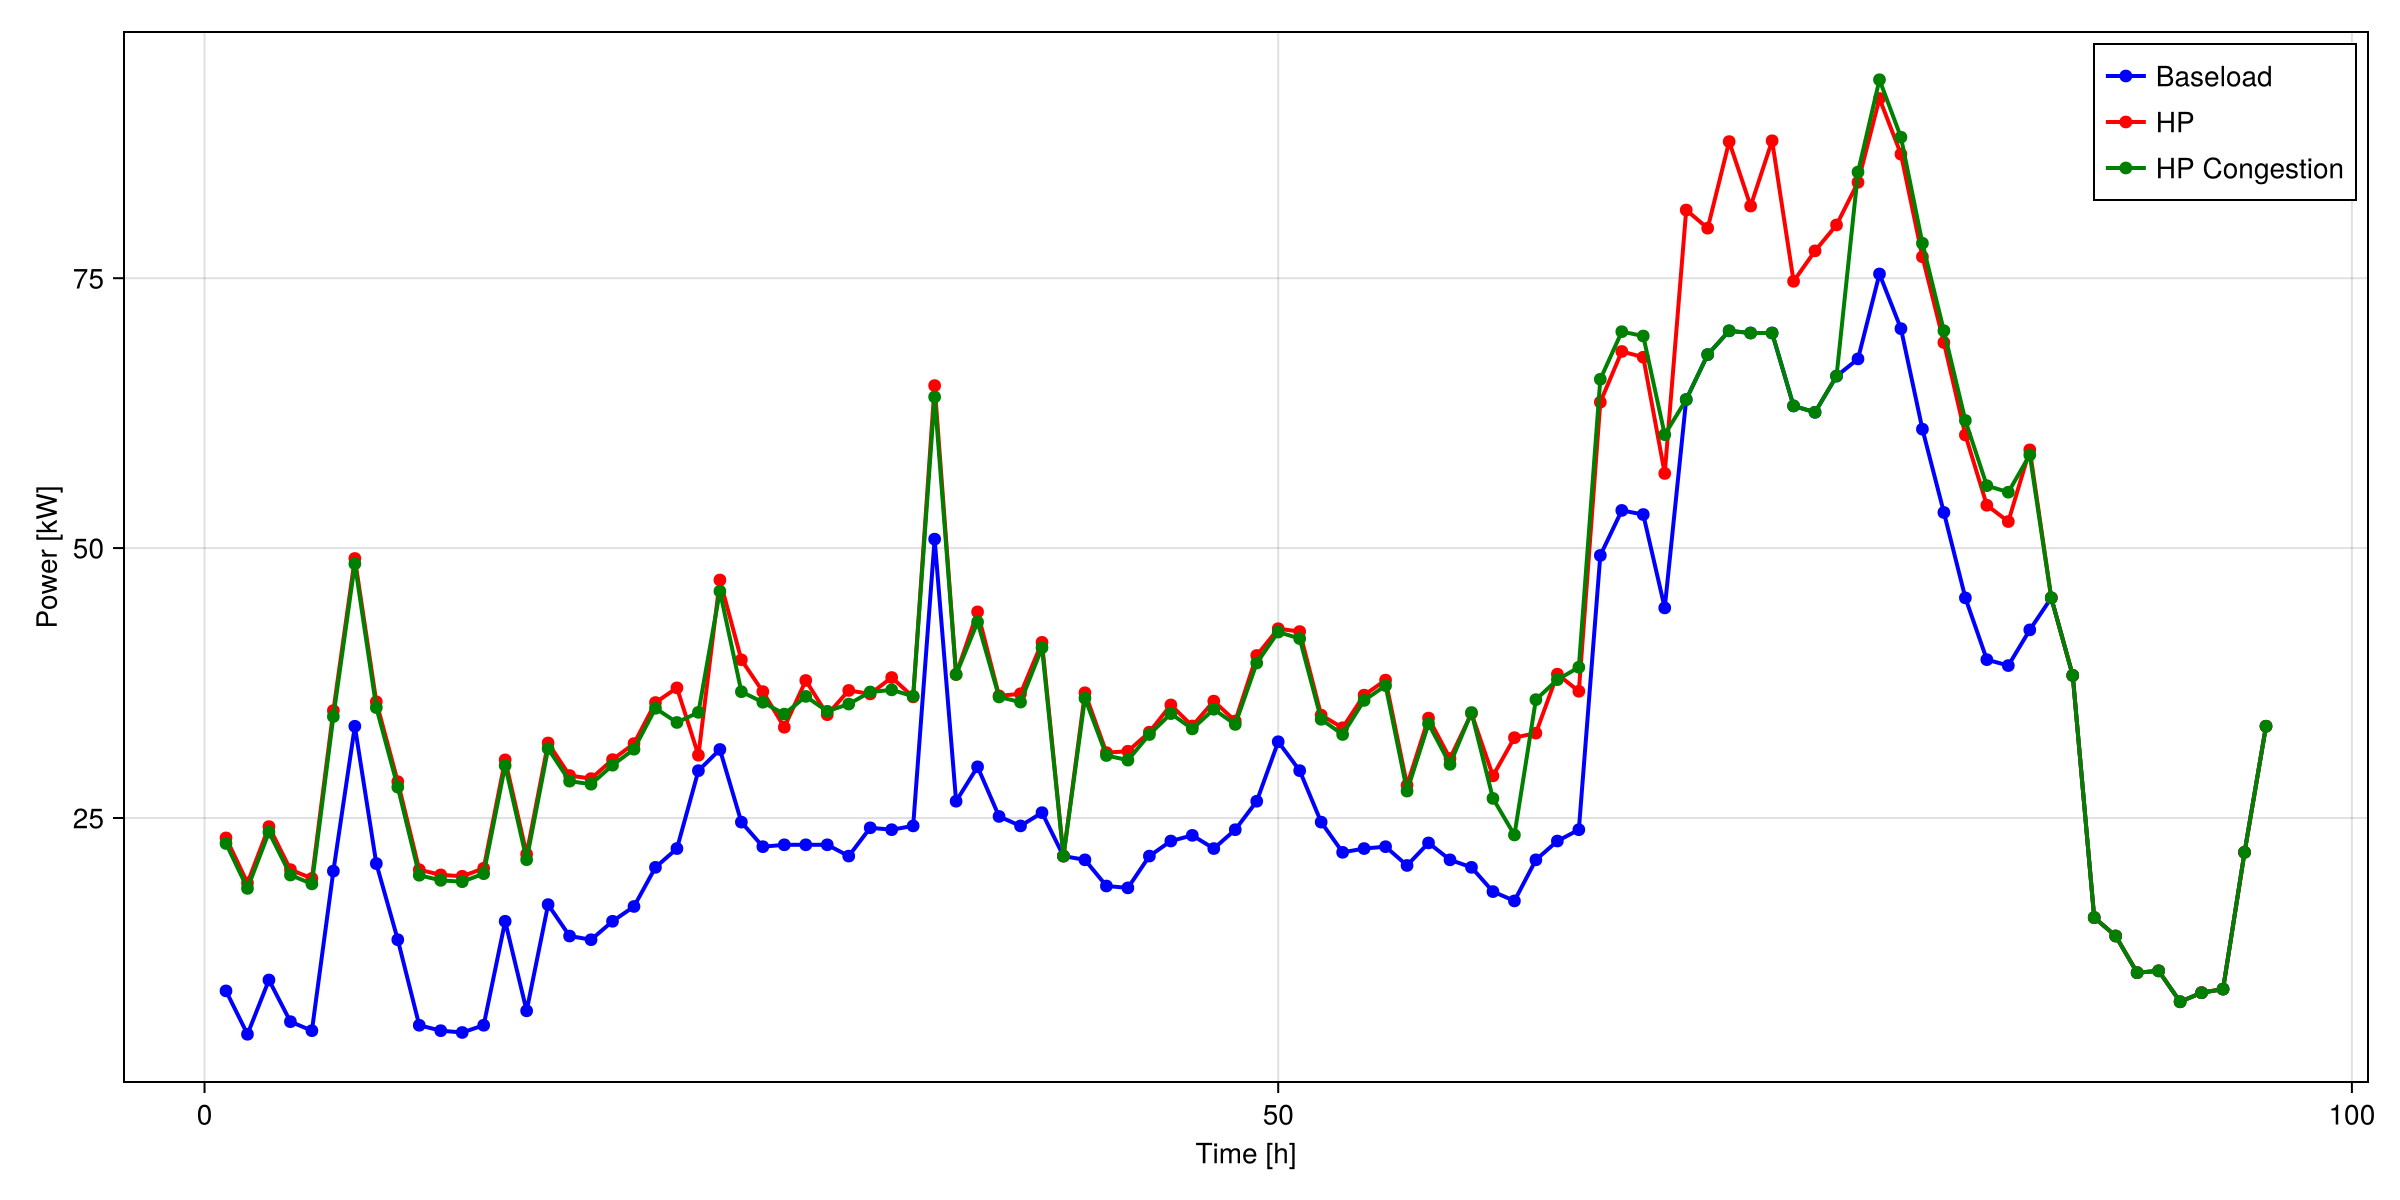

In [16]:
base = base_nohp.P
kW_hp = base_hp.P_kw
kW_cong = base_hp_cong.P_kw

fig = Figure(;size = (1200, 600))

ax = Axis(fig[1, 1]; xlabel = "Time [h]", ylabel = "Power [kW]")
scatterlines!(ax, base, color = :blue, linewidth = 2, label = "Baseload")
scatterlines!(ax, kW_hp, color = :red, linewidth = 2, label = "HP")
scatterlines!(ax, kW_cong, color = :green, linewidth = 2, label = "HP Congestion")

axislegend(ax)

fig

## Save to a new CSV

In [18]:
result_df = DataFrame(
    Baseload = base_nohp.P,
    HP = base_hp.P_kw,
    HP_Congestion = base_hp_cong.P_kw
)

CSV.write("results/compare_hp.csv", result_df)

"results/compare_hp.csv"